In [19]:
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load .env enviroment variables into the notebook
load_dotenv()
# Get the postgres connection information from os file. 

DB_HOST = os.getenv('DB_HOST')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')


In [8]:
# initialize database engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:5432/Houston_real_estate')


In [9]:
#run query to extract properties that are on the market from Harris County Appraisal district (HCAD) 
# database; street name and number should match; apartment number should match; zip code 
# must match between hcad table and har table; there should not be any properties with 0 appraisal 
# value and also should not be any properties with 0 street number as these represent plots of land
# that don't yet have an address and are owed by the county. 
price_vs_appraised_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0 ;
''',engine)


In [11]:
price_vs_appraised_df.head(50)

,mls,address,zipcode,har price,hcad appraised value,hcad total mkt value
0,93478568,"1 Raydon Lane, Bunker Hill Village, TX 77024",77024,1399000.0,2920000.0,2920000.0
1,81557861,"1 Mott Lane, Piney Point Village, TX 77024",77024,2750000.0,3055509.0,3055509.0
2,59662089,"1 W Broad Oaks Drive, Houston, TX 77056",77056,1399000.0,1329455.0,1329455.0
3,91331068,"10 Talisman Court, Houston, TX 77076",77076,119000.0,128087.0,128087.0
4,95551804,"10 Dolly Wright Street, Houston, TX 77088",77088,75000.0,27542.0,27542.0
5,4961279,"10 Chippewa Trail, Spring, TX 77389",77389,579000.0,459424.0,459424.0
6,60462629,"10 Pintuck Place, Spring, TX 77389",77389,443000.0,361808.0,361808.0
7,37102799,"100 W Hamilton Street, Houston, TX 77076",77076,420000.0,291453.0,291453.0
8,83574598,"1000 Bartlett Street, Houston, TX 77006",77006,650000.0,464733.0,464733.0
9,89144504,"1000 Kirby Drive, Houston, TX 77019",77019,17995000.0,10613999.0,16047600.0


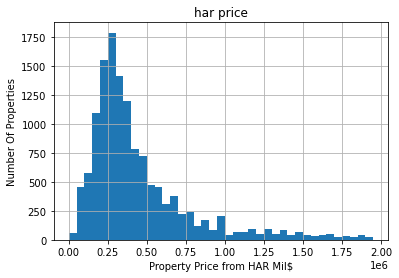

In [16]:
#Har price distribotion for the whole Harris county
custom_bins=[0+x*50000 for x in range(0, 40)]
price_vs_appraised_df.hist(column='har price', bins=custom_bins)
plt.xlabel('Property Price from HAR Mil$')
plt.ylabel("Number Of Properties");

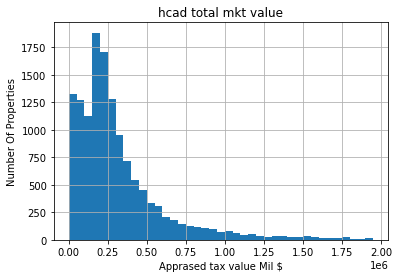

In [17]:
price_vs_appraised_df.hist(column='hcad total mkt value', bins=custom_bins)
plt.xlabel('Apprased tax value Mil $')
plt.ylabel("Number Of Properties");

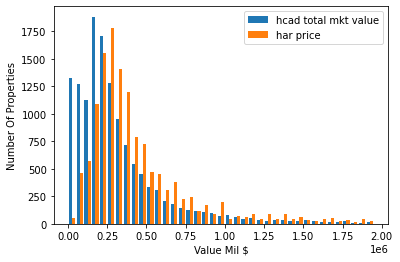

In [24]:

# conclusion - 
plt.hist([price_vs_appraised_df['hcad total mkt value'], price_vs_appraised_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.show()

In [25]:
#Extract properties from zip code 77026 
price_vs_appraised_77026_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0
and ha.zipcode='77026';
''',engine)

In [26]:
price_vs_appraised_77026_df

,mls,address,zipcode,har price,hcad appraised value,hcad total mkt value
0,22662974,"1607 Elysian Street, Houston, TX 77026",77026,224995.0,129097.0,129097.0
1,56862026,"2010 Davis Street, Houston, TX 77026",77026,249999.0,61950.0,61950.0
2,45597500,"2106 Bringhurst Street, Houston, TX 77026",77026,150000.0,45000.0,45000.0
3,19627740,"2109 Semmes Street, Houston, TX 77026",77026,400000.0,300000.0,300000.0
4,37377042,"2119 Bringhurst Street, Houston, TX 77026",77026,72000.0,22500.0,22500.0
...,...,...,...,...,...,...
165,12325922,"5947 Collingsworth, Houston, TX 77026",77026,52500.0,28263.0,28263.0
166,14452058,"6218 Granton Street, Houston, TX 77026",77026,35000.0,28263.0,28263.0
167,56218382,"6305 Cavalcade Street, Houston, TX 77026",77026,275000.0,146504.0,146504.0
168,8590752,"6305 Kashmere Street, Houston, TX 77026",77026,95000.0,29340.0,29340.0


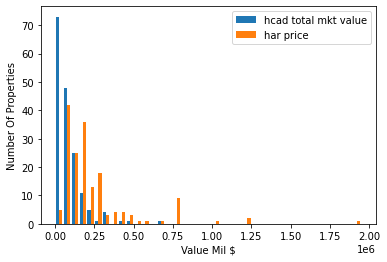

In [27]:
#plot for less affluent zip code 77026
plt.hist([price_vs_appraised_77026_df['hcad total mkt value'], price_vs_appraised_77026_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.show()

In [32]:
#Extract properties from zip code 77005 
price_vs_appraised_77005_df = pd.read_sql('''
select ha.mls,ha.address,ha.zipcode,
ha.price as "har price", r.tot_appr_val as "hcad appraised value",
r.tot_mkt_val as "hcad total mkt value"
from har_address ha, real_acct r
where ha.zipcode = r.site_addr_3
and upper(ha.streetname) = upper(r.str)
and ha.addressnumber = r.str_num
and r.str_unit=ha.occupancyidentifier
and r.str_num!='0'
and r.tot_appr_val!=0
and ha.zipcode='77005';
''',engine)

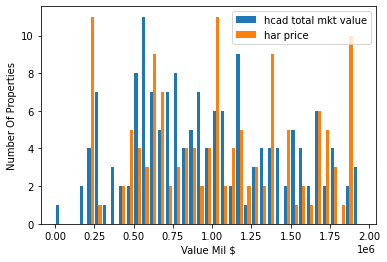

In [33]:
#Plot for rich zip code 77005
plt.hist([price_vs_appraised_77005_df['hcad total mkt value'], price_vs_appraised_77005_df['har price']], custom_bins, label=['hcad total mkt value', 'har price'])
plt.legend(loc='upper right')
plt.xlabel('Value Mil $')
plt.ylabel("Number Of Properties");
plt.show()

<Figure size 432x432 with 0 Axes>

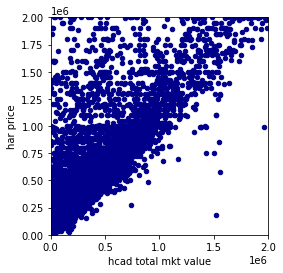

In [40]:
ax.set_aspect(1.5)
plt.figure(figsize = (6,6))
ax=price_vs_appraised_df.plot.scatter(x='hcad total mkt value',
                      y='har price',
                      c='DarkBlue')
ax.set_aspect(1)
plt.xlabel('hcad total mkt value')
plt.ylabel("har price");
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.show()